In [1]:
from quantile_forest import RandomForestQuantileRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from tinycp.regressor import ConformalizedQuantileRegressor
from tinycp.plot import plot_prediction_intervals

In [2]:
data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [4]:
rf = RandomForestQuantileRegressor(random_state=42, default_quantiles=[0.05, 0.95], n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)

RandomForestQuantileRegressor(default_quantiles=[0.05, 0.95], n_jobs=-1,
                              oob_score=True, random_state=42)

In [5]:
reg = ConformalizedQuantileRegressor(
    rf,
    quantiles=[0.05, 0.95],
)
reg.fit(X_train, y_train, oob=True)

In [6]:
y_pred_intervals = reg.predict_interval(X_test)
y_pred = reg.predict(X_test)

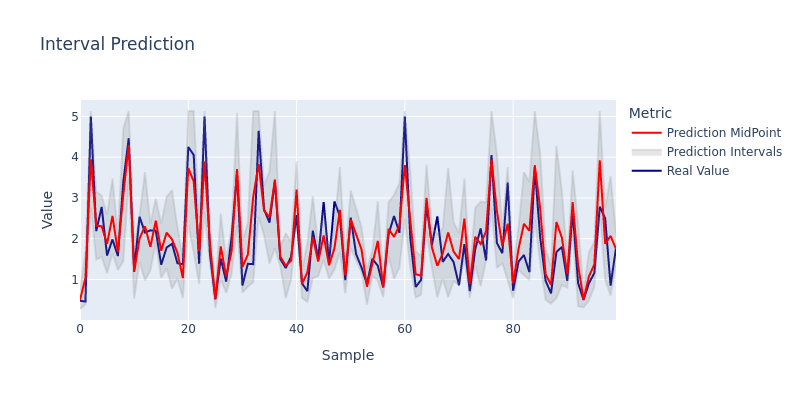

In [7]:
plot_prediction_intervals(y_pred_intervals[:100], y_pred[:100], y_test[:100], fig_type="png")